# SI618 Lab 8

### Total score is 100 points

  **Make sure you show your code and explain your answers for each question**

## Overview

This lab consists of an exploration of a well-known UCI data set about wine quality.  The dataset comes from https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

## Wine Dataset

We get you started by loading some libraries as well as the wine quality dataset:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Q1. [5 points] What is the median of 'quality'?


In [3]:
wine["quality"].median()

6.0

The median of "quality" is 6

### Q2. [20 points] What is the mean, median and 95% percentile range [2.5%, 97.5%] of all variables except quality? Please use a markdown cell

In [4]:
# print(wine.drop(["quality"], axis=1).mean())
# print(wine.drop(["quality"], axis=1).median())
# print()
df = pd.DataFrame(wine.drop(["quality"], axis=1).mean(), columns=["mean"])
df["median"] = wine.drop(["quality"], axis=1).median()
df["2.5%"] = wine.drop(["quality"], axis=1).quantile(0.025).T
df["97.5%"] = wine.drop(["quality"], axis=1).quantile(0.975).T                                                 

### The answer in markdown is
|                      |       mean |   median |      2.5% |    97.5% |
|:---------------------|-----------:|---------:|----------:|---------:|
| fixed acidity        |  8.31964   |  7.9     |  5.6      |  12.5    |
| volatile acidity     |  0.527821  |  0.52    |  0.24     |   0.915  |
| citric acid          |  0.270976  |  0.26    |  0        |   0.66   |
| residual sugar       |  2.53881   |  2.2     |  1.4      |   6.3    |
| chlorides            |  0.0874665 |  0.079   |  0.048    |   0.205  |
| free sulfur dioxide  | 15.8749    | 14       |  3        |  40.525  |
| total sulfur dioxide | 46.4678    | 38       | 10        | 131      |
| density              |  0.996747  |  0.99675 |  0.992939 |   1.0004 |
| pH                   |  3.31111   |  3.31    |  3.0195   |   3.6105 |
| sulphates            |  0.658149  |  0.62    |  0.44     |   1.08   |
| alcohol              | 10.423     | 10.2     |  9.1      |  12.8    |

### Q3a. [5 points] Create a column based on quality called 'good_wine'. If the quality is greater or equal to the median, it returns 'yes', otherwise it returns 'no' (Hint: you can use the pd.cut function we learnt earlier. Try to avoid using for loops)

In [5]:
# df["good_wine"] = df["quality"] >= df["quality"]
wine["good_wine"] = pd.cut(
    wine["quality"], 
    bins=[wine["quality"].min(), wine["quality"].median(), wine["quality"].max()], 
    labels=["no", "yes"],
    right=False
)
wine["good_wine"]

0        no
1        no
2        no
3       yes
4        no
       ... 
1594     no
1595    yes
1596    yes
1597     no
1598    yes
Name: good_wine, Length: 1599, dtype: category
Categories (2, object): ['no' < 'yes']

### Q3b. [10 points] Create a column based on residual sugar called 'sweetness'. Assign the labels "low" to the first quartile, "moderate" to the second and third quartiles, and "high" to the fourth. (Hint: Consider using the pd.qcut function)

In [6]:
wine["sweetness"] = pd.qcut(
    wine["residual sugar"],
    [0, 0.25, 0.75, 1],
    labels=["low", "moderate", "high"]
)
wine["sweetness"]

0            low
1       moderate
2       moderate
3            low
4            low
          ...   
1594    moderate
1595    moderate
1596    moderate
1597    moderate
1598        high
Name: sweetness, Length: 1599, dtype: category
Categories (3, object): ['low' < 'moderate' < 'high']

### Q4. [20 points] Create violin plot  that shows the ph levels (y-axis) for wines with different quality (x-axis), separated according to this new "sweetness" column.  What can you say about the interaction of acidity (i.e. pH. lower pH means more acidic) and sweetness as the quality of the wine varies? (You can adjust figure size if details aren't clear).

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine,sweetness
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,no,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,no,moderate
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,no,moderate
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,yes,low
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,no,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,no,moderate
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,yes,moderate
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,yes,moderate
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,no,moderate


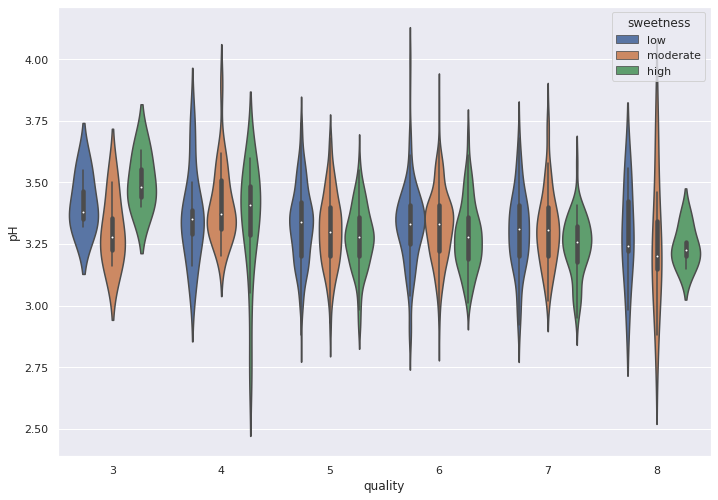

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x="quality", y="pH", hue="sweetness", data=wine)
wine

With higher quality, the wine with high sweetness will taste more acid as well. For wines with low sweetness, they will have a acidity of a larger range. For moderate sweetness, there will be less wines with ph ranging from 3.15~3.35

### Q4. [15 points] Make a pairplot that uses color to differentiate good and bad wine using the good_wine for the following:
- fixed acidity
- volatile acidity
- citric acid 
- residual sugar
- free sulfur dioxide 
- pH 
- alcohol

### Answer the following two questions:
1. Which variable distribution is most different across good and bad wines?
2. List at least one pair of positively correlated and one pair of negatively correlated variables

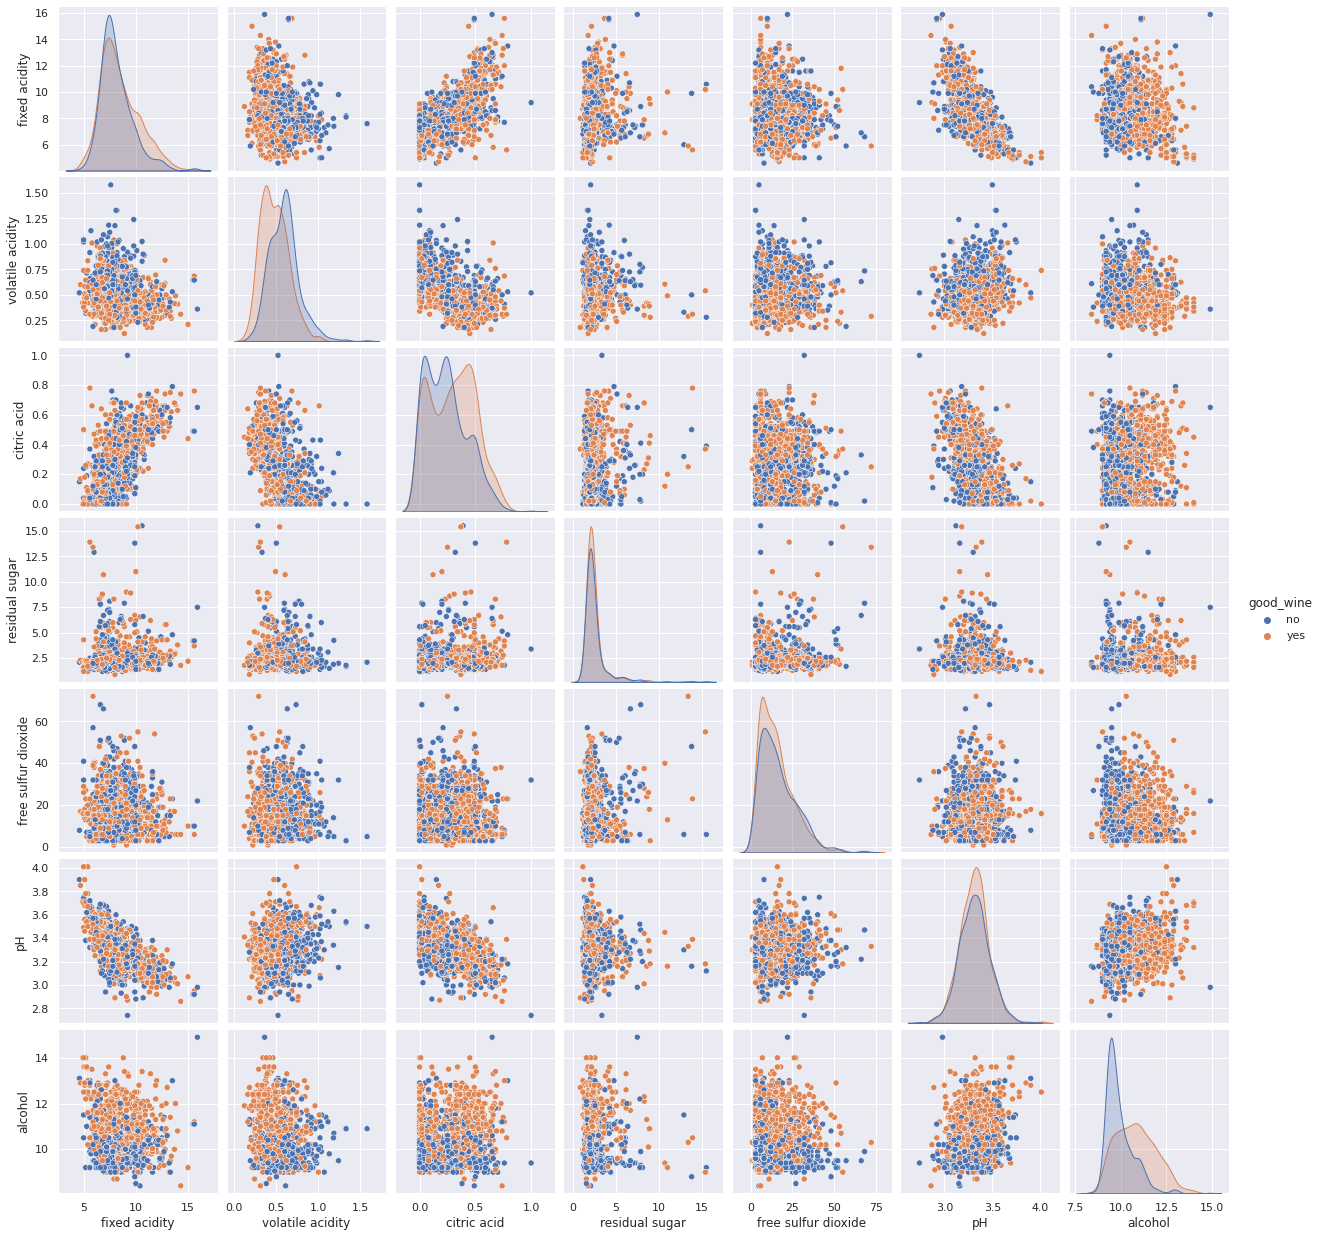

In [8]:
sns.pairplot(wine, hue="good_wine", vars=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "free sulfur dioxide", "pH", "alcohol"])

1. The alcohol is distributed most differently between two variables
2. The fixed acidity and critic acid are postively correlated. The pH and fixed acidity are negatively correlated.

### Q5. [10 points] Create a mosaic plot to observe the relationship between **sweetness** and **good_wine**. Does it seem like good wines more likely to be associated with a characteristic level of sweetness? 

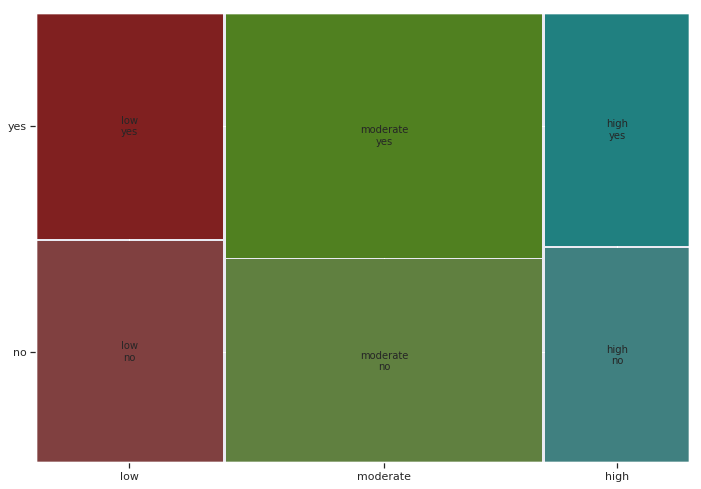

In [9]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data=wine, index=["sweetness", 'good_wine'])
plt.show()

There is no obvious relationship between the sweetness and quality. But it seems that most of the wines with moderate sweetness are good wines.

### Q6. [10 points] Starting with a cross tabulation of the actual data, create a table that shows the number of wines by quality (good or not) that would be associated with different levels of sweetness if sweetness was not related to quality

In [10]:
cross = pd.crosstab(wine.sweetness, wine.good_wine)
cross

good_wine,no,yes
sweetness,,
low,226,231
moderate,350,423
high,168,183


### Q7. [5 points] Is the relationship you observe between sweetness and quality based on Q5 and Q6 statistically significant? ($\alpha = 0.05$) 

In [11]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(cross)
print("chi2={}".format(chi2))
print("p={}".format(p))

chi2=2.1264196473828982
p=0.34534553111554733


Since the P value is larger than 0.05, so there is no significant relationship between sweetness and quality.

# <font color='red'>Submission Details:</font>
## <font color='red'> Please submit both si618_lab8_uniqname.ipynb and si618_lab8_uniqname.html SEPARATELY on canvas</font>